Forward-Backward Splitting
===================================

$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\enscond}[2]{\lbrace #1, #2 \rbrace}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\umax}[1]{\underset{#1}{\max}\;}$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\uargmin}[1]{\underset{#1}{\arg\min}\;}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\diag}[1]{{diag}\left( #1 \right)}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\qarrq}{ \quad \Longrightarrow \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\CC}{\mathbb{C}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\Zz}{\mathcal{Z}}$
$\newcommand{\Ww}{\mathcal{W}}$
$\newcommand{\Vv}{\mathcal{V}}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\NN}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\Ee}{\mathcal{E}}$
$\newcommand{\Cc}{\mathcal{C}}$
$\newcommand{\Gg}{\mathcal{G}}$
$\newcommand{\Ss}{\mathcal{S}}$
$\newcommand{\Pp}{\mathcal{P}}$
$\newcommand{\Ff}{\mathcal{F}}$
$\newcommand{\Xx}{\mathcal{X}}$
$\newcommand{\Mm}{\mathcal{M}}$
$\newcommand{\Ii}{\mathcal{I}}$
$\newcommand{\Dd}{\mathcal{D}}$
$\newcommand{\Ll}{\mathcal{L}}$
$\newcommand{\Tt}{\mathcal{T}}$
$\newcommand{\si}{\sigma}$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$


In [52]:
source("../../nt_toolbox/general.R")
source("../../nt_toolbox/signal.R")
source("../../nt_toolbox/stemplot.R")
source("../../nt_toolbox/norms.R")
library(pracma)
library(SynchWave)

This numerical tour presents the Forward-Backward (FB) algorithm to
minimize the sum of a smooth and a simple function. It shows an
application to sparse deconvolution.

Forward-Backward Algorithm
--------------------------
We consider the problem of minimizing the sum of two functions
$$ E^\star = \umin{x \in \RR^N} E(x) = f(x) + g(x). $$

So, we want to find a vector $x^{\star}$ solution to the problem, i.e. a minimizer of $E=f+g$.


We assume that $f$ is a $C^1$ function with $L$-Lipschitz gradient.



We also assume that $g$ is "simple", in the sense that one can compute exactly and quickly its proximity operator, which is defined as
$$ \text{prox}_{\ga g}(x) = \uargmin{y \in \RR^N} \frac{1}{2}\norm{x-y}^2 + \ga g(y). $$
for any $\ga > 0$.


The forward-backward algorithm reads, after initializing $x^{(0)} \in \RR^N$,
$$ x^{(k+1)} = \text{prox}_{\ga g}\pa{ x^{(k)} - \ga \nabla f( x^{(k)} )  }. $$


If $0 < \ga < \frac{2}{L}$, then this scheme converges to a minimizer of
$f+g$.

Sparse Regularization of Inverse Problems
-----------------------------------------
We consider a linear inverse problem
$$ y = \Phi x_{0} + w  \in \RR^P$$
where $x_{0} \in \RR^N$ is the (unknown) signal to recover, $w \in
\RR^P$ is a noise vector, and $\Phi \in \RR^{P \times N}$ models the
acquisition device.


To recover an estimate of the signal $x_{0}$, we consider  basis
pursuit denoising, which makes use of the $\ell^1$ norm as sparsity
enforcing penalty:
$$ \umin{x \in \RR^N} \frac{1}{2} \norm{\Phi x-y}^2 + \la \norm{x}_1, $$
where the $\ell^1$ norm is defined as
$$ \norm{x}_1 = \sum_i \abs{x_i}. $$


The parameter $\la$ should be set in accordance to the noise level
$\norm{w}$.


This minimization problem can be cast in the form of minimizing $f+g$
where
$$ f(x) = \frac{1}{2} \norm{\Phi x-y}^2
\qandq g(x) = \la \norm{x}_1. $$


$f$ is smooth; we have
$$ \nabla f(x) = \Phi^{*} (\Phi x - y),  $$
which is $L$-Lipschitz continuous, with
$$ L = \norm{ \Phi^* \Phi }. $$


The $\ell^1$-norm is "simple", because its proximal operator is soft
thresholding:
$$ \big(\text{prox}_{\ga g}(x)\big)_n = \max\pa{ 0, 1 - \frac{\la \ga}{\abs{x_n}} } x_n. $$

Signal Deconvolution on Synthetic Sparse Data
-----------------------------------------------------
A simple linearized model of seismic acquisition considers a linear filtering
operator (convolution):
$$ \Phi x = \phi \ast x $$

The filter $\phi$ is called the impulse response, or the poind spread function, of the acquisition process $x\mapsto \Phi x$.

In [2]:
N = 1024

We define the width of the filter $h$.

In [3]:
s = 5

Second derivative of a
Gaussian.

In [4]:
t = c(-(N/2) : ((N/2) - 1))
h = (1-t**2/s**2)*exp(-(t**2)/(2*s**2))
h = h - mean(h)

In [5]:
h1 = fftshift(h)
Phi = function (u) {Re(ifft(fft(h1) * fft(c(u))))}

We display the filte and its spectrum (amplitude of its Fourier transform).

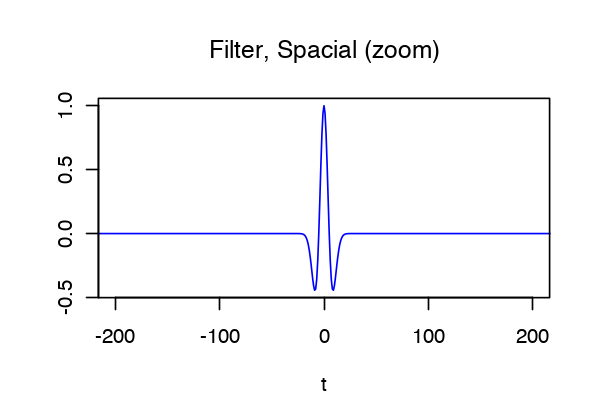

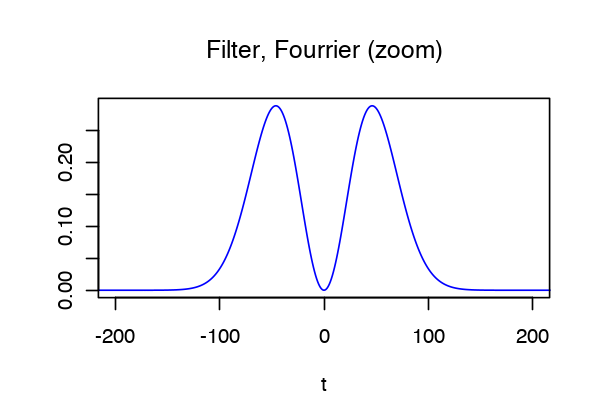

In [8]:
# Fourier transform (normalized)
hf = Re(fftshift(fft(h1))) / sqrt(N)

options(repr.plot.width=5, repr.plot.height=3.5)
q = 200

plot(t,h, type="l", main="Filter, Spacial (zoom)", col="blue",
     xlim=c(-200,200), ylab="")

plot(t, hf, type="l", main="Filter, Fourrier (zoom)",
     col="blue", xlim=c(-200,200), ylab="")

We generate a synthetic sparse signal $x_{0}$, with only a small number of nonzero
coefficients.

Number of Diracs of the signal.

In [9]:
s = round(N * 0.03)

Set the seed-number (for reproductibility).

In [15]:
set.seed(1)

Location of the diracs.

In [16]:
sel = sample(c(1 : N))
sel = sel[0:s]

Signal $x_{0}$.

In [17]:
x0 = zeros(1, N)
x0[sel] = 1.
x0 = x0 * sign(randn(1, N)) * (1 - 0.3 * rand(1, N))

Noise level.

In [18]:
sigma = 0.06

Compute the measurements $y= \Phi x_{0} + w$ where $w$ is a realization
of white Gaussian noise of variance $\sigma^{2}$.

In [19]:
y = Phi(x0) + sigma * randn(1, N)

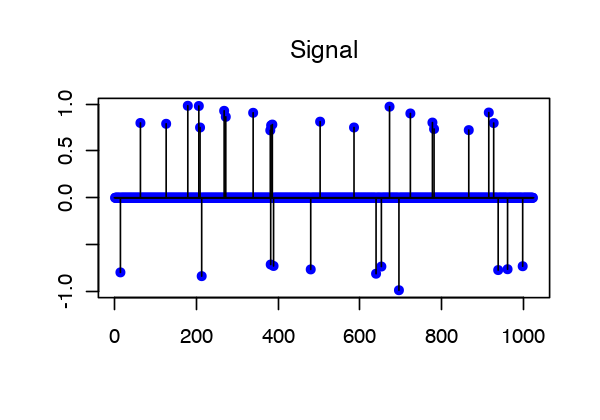

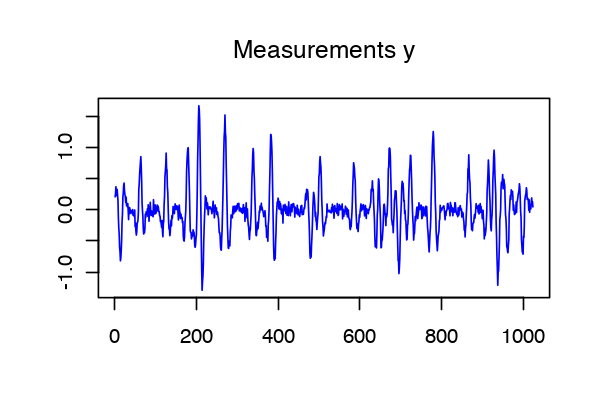

In [20]:
stemplot(x0, col="blue", ylab="", xlab="", main="Signal")
plot(c(1:N), y, xlab="", ylab="", col="blue", main="Measurements y", type="l")

Deconvolution
---------------------------
We now implement the foward-backward algorithm to recover an estimate of the sparse signal


We define the regularization parameter $\la$.

In [21]:
Lambda = 1.

We define the proximity operator of $\ga g$.

In [22]:
proxg = function(x, gamma, Lambda) {pmax(abs(x) - (Lambda * gamma), 0) * sign(x)}

We define the gradient operator of $f$. Note that $A^*=A$ because the filter $h$ is symmetric.

__Exercise__ 

Write the code of the function grad_f.

In [23]:
grad_f = function(x){Phi(Phi(x) - y)}

We define the Lipschitz constant $\beta$ of $\nabla f$.

In [24]:
L = max(abs(fft(h)))^2

We define the stepsize $\ga$, which must be smaller than $2/\beta$.

In [25]:
gamma = 1.95 / L

We compute the solution of $\ell_1$ deconvolution (basis pursuit denoising).
We keep track of the energy $E_k=f(x^{(k)})+g(x^{(k)})$.

__Exercise__ 

Write the code of the forward-backward iteration.

In [26]:
nbiter = 4000

# Storing the results in a matrix
E = rep(0, nbiter + 1)
x = y
E[1] = 0.5 * norm(Phi(x) - y)^2 + Lambda * l1_norm(x)

for (k in 1:nbiter)
{
    x = proxg(x - gamma * grad_f(x), gamma, Lambda)
    E[k + 1] = 0.5 * norm(Phi(x) - y)^2 + Lambda * l1_norm(x)
}

We plot the relative error $(E_k-E^\star)/(E_0-E^\star)$ in log-scale with respect to $k$.

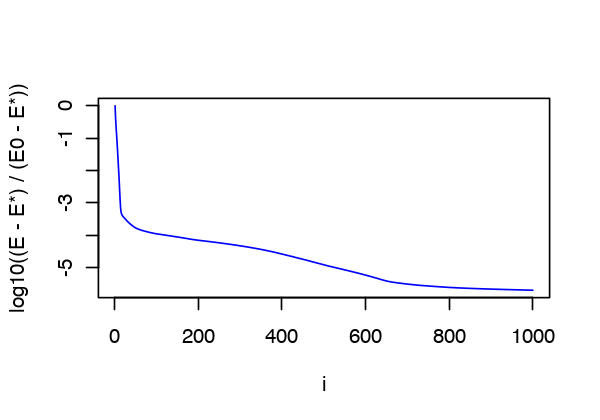

In [27]:
E_plot = (E[1:(nbiter / 4)] - E[nbiter + 1]) / (E[1] - E[nbiter + 1])
plot(log10(E_plot), type="l", col="blue", ylab="log10((E - E*) / (E0 - E*))", xlab="i")

We display the result.

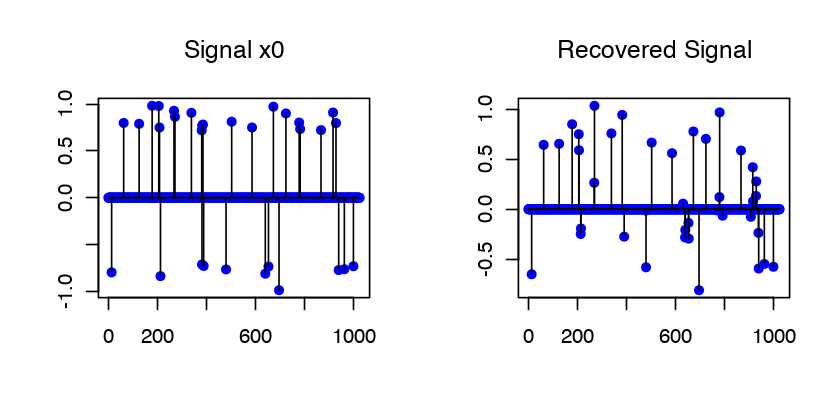

In [28]:
par(mfrow=c(1,2))
options(repr.plot.width=7, repr.plot.height=3.5)
stemplot(x0, col="blue", ylab="", xlab="", main="Signal x0")
stemplot(x, col="blue", ylab="", xlab="", main="Recovered Signal")

Over-relaxed Forward-Backward
-----------------------------
It is possible to introduce a relaxation parameter $\rho$ with $0 < \rho < 1$. The over-relaxed foward-backward algorithm initializes $x^{(0)} \in \RR^N$,
and then iterates, for $k=1,2,\ldots$
$$ z^{(k)} = \text{prox}_{\ga g}\pa{
              x^{(k-1)} - \ga \nabla f( x^{(k-1)} )  }.
$$
$$ x^{(k)} = z^{(k)} +
      \rho \pa{ z^{(k)} - x^{(k-1)} } $$


Let us assume $\gamma=1/\beta$. Convergence of the iterates $x^{(k)}$ and $z^{(k)}$ to a solution is guaranteed
for $ 0 < \rho < 1/2 $. The weaker property of convergence of $ E(x^{(k)}) $
to $E^\star$ is proved, when $ 1/2\leq \rho <1 $.

In [29]:
gamma = 1 / L

__Exercise__ 

Write the code of the over-relaxed forward-backward iteration.

Warning message in lines(log10(E_plot), col = i):
“Si è prodotto un NaN”

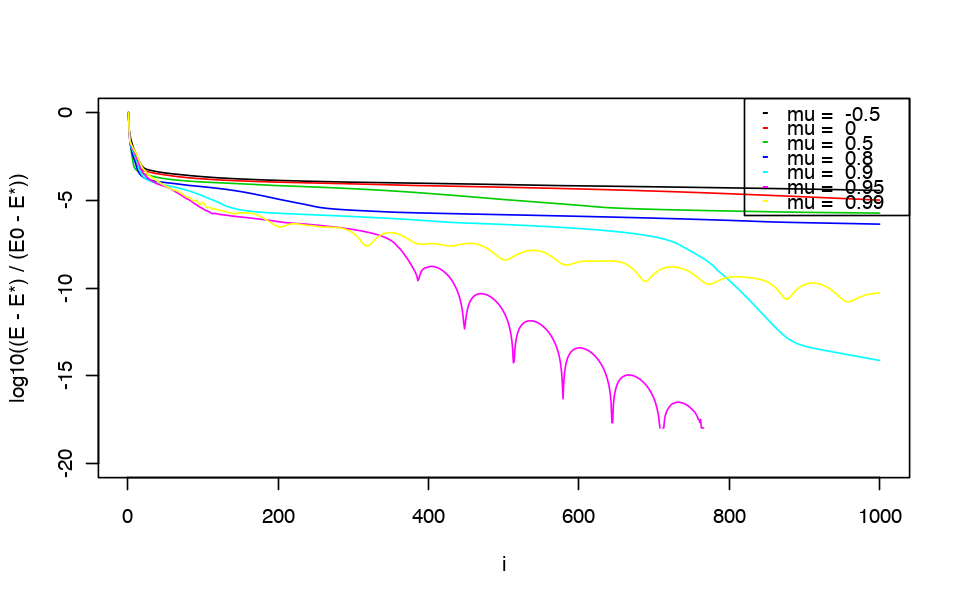

In [35]:
nbiter = 4000

mu_list = c(-0.5, 0, 0.5, 0.8, 0.9, 0.95, 0.99)

# Storing the results
Erelax = rep(list(rep(0, nbiter + 1)), length(mu_list))

ind = 1

for (mu in mu_list)
{
    x = y
    z = y
    Erelax[[ind]][1] = 0.5 * norm(Phi(x) - y)^2 + Lambda * l1_norm(x)
    for (k in 1:nbiter)
    {
        xold = x
        zold = z
        x = proxg(z - gamma * grad_f(z), gamma, Lambda)
        z = x + mu * (x - xold)
        Erelax[[ind]][k + 1] = 0.5 * norm(Phi(x) - y)^2 + Lambda * l1_norm(x)
    }
    ind = ind + 1
}

options(repr.plot.width=8, repr.plot.height=5)

E_plot = (Erelax[[1]][1 : (nbiter / 4)] - Erelax[[1]][nbiter + 1]) / (Erelax[[1]][1] - Erelax[[1]][nbiter + 1]) 
plot(log10(E_plot), type="l", col=1, ylab="log10((E - E*) / (E0 - E*))", xlab="i", ylim=c(-20, 0))

for (i in 2:length(mu_list))
{
    E_plot = (Erelax[[i]][1 : (nbiter / 4)] - Erelax[[i]][nbiter + 1]) / (Erelax[[i]][1] - Erelax[[i]][nbiter + 1]) 
    lines(log10(E_plot), col=i)
}

vec_legend = lapply(mu_list, function(x){paste("mu = ", x)})

legend("topright", legend=vec_legend, col=1:length(mu_list), pch="-")

As we see, in this example, over-relaxation does not bring any speedup, because $\gamma$ is lower than without over-relaxation. There are other setting parameters or other problems, for which over-relaxation does bring a significant speedup. 

FISTA-like Accelerated Forward-Backward Algorithm
---------------------------
We consider the FISTA algorithm introduced in:


A. Beck and M. Teboulle,
"A Fast Iterative Shrinkage-Thresholding Algorithm for Linear Inverse Problems",
_SIAM Journal on Imaging Sciences_, 2009.

More precisely, we consider a slightly modified version of FISTA, whose convergence is proved, see
A. Chambolle and C. Dossal, "On the convergence of the iterates of "FISTA"", preprint, 2015.

Given an initial estimate $x^{(0)}$ of the solution and a parameter $a>2$, the algorithm sets $\gamma=1/\beta$, sets $z^{(0)}=x^{(0)} \in \RR^N$,
and iterates, for $k=1,2,\ldots$
$$ x^{(k)} = \text{prox}_{\ga g}\pa{
              z^{(k-1)} - \ga \nabla f( z^{(k-1)} )  }.
$$
$$ \alpha_k=(k-1)/(k+a) $$
$$ z^{(k)} = x^{(k)} +
      \alpha_k
  \pa{ x^{(k)} - x^{(k-1)} } $$


It is proved that the iterates $x^{(k)}$ converge to a solution $x^\star$ of the problem. Moreover, 
the  optimal convergence rate for this class of problems is reached,
namely
$$ E_k - E^\star = O(1/k^2), $$
whereas the convergence rate for the normal forward-backward is only
$O(1/k)$.

Note the difference between the over-relaxed forward-backward and the accelerated forward-backward: the later is based on an inertia mechanism, of different nature than over-relaxation.

__Exercise__

Write the code of the accelerated forward-backward iteration.

In [33]:
gamma = 1 / L
nbiter = 4000
x = y
z= y
t = 1

E_fista = rep(0, nbiter + 1)
E_fista[1] = 0.5 * norm(Phi(x) - y)^2 + Lambda * l1_norm(x)

for (k in 1 : nbiter)
{
    xold = x
    told = t
    x = proxg(z - gamma * grad_f(z), gamma, Lambda)
    t = (1 + sqrt(1 + 4 * t^2) ) / 2;
    z = x + (told - 1) / t * ( x - xold );
    E_fista[k + 1] = 0.5 * norm(Phi(x) - y)^2 + Lambda * l1_norm(x)  
}

In [34]:
# Taking the minimum value obtained so far
E_min = min(min(E_fista), min(Erelax[[7]]), min(E))


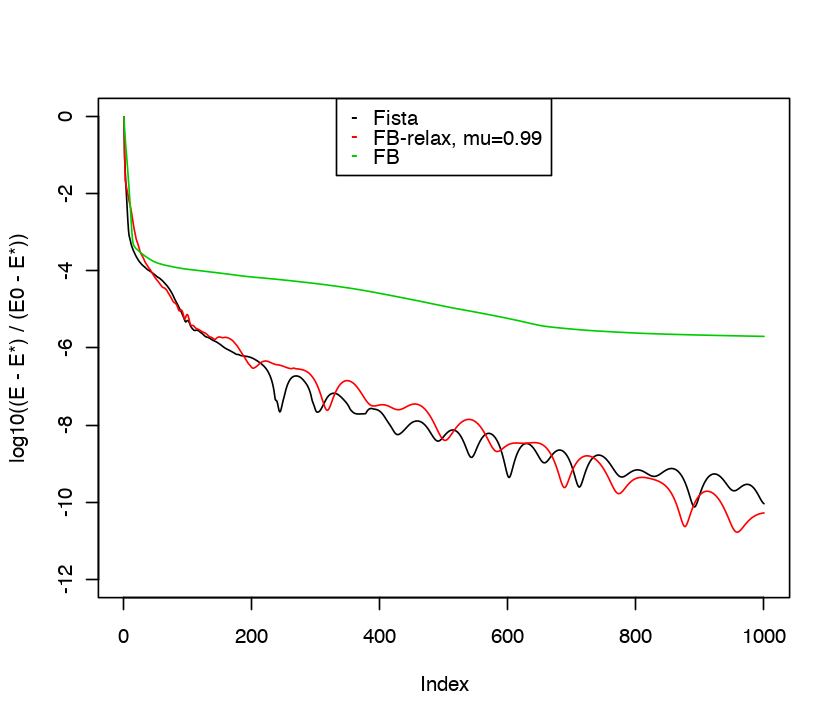

In [51]:
# Vector to plot
E_fista_plot = (E_fista[1 : (nbiter / 4)] - E_min) / (E_fista[1] - E_min)
E_relax_plot = (Erelax[[7]][1 : (nbiter / 4)] - E_min) / (Erelax[[7]][1] - E_min)
E_plot = (E[1 : (nbiter / 4)] - E[nbiter]) / (E[1] - E[nbiter])

options(repr.plot.width=7, repr.plot.height=6)

plot(log10(E_fista_plot), type="l", col=1, ylim=c(-12,0), ylab="log10((E - E*) / (E0 - E*))")
lines(log10(E_relax_plot), col=2)
lines(log10(E_plot), col=3)

legend("top", legend=c("Fista", "FB-relax, mu=0.99", "FB"), 
       col=1:3, pch="-")

We can note that the accelerated forward-backward is not monotonic: the cost function E is not decreasing along with the iterations and some oscillations are present.